In [19]:
from glob import glob
import numpy as np
from skimage import measure, io, transform
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import seaborn as sns
import warnings
import os


### Useful functions

In [20]:
def bound_box(image, labeled_mask, aff=True, edgecolor='red', linewidth=1):
    """
    Plot bounding boxes around regions in the image corresponding to the labeled mask.

    Args:
        image (array-like): Input image.
        labeled_mask (array-like): Labeled mask of the regions in the image.
        aff (bool, optional): Flag to enable or disable plotting. Default is True (enabled).

    Returns:
        list: List of bounding boxes, where each bounding box is represented as [label, (min_row, min_col, max_row, max_col)].

    Example:
        bboxs = plot_bbox(image, labeled_mask, aff=True)
    """
    props = measure.regionprops(labeled_mask)
    bboxs = []

    for prop in props:
        label = prop.label
        min_row, min_col, max_row, max_col = prop.bbox
        bboxs.append([label, (min_row, min_col, max_row, max_col)])
        
    if aff:
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(image, cmap='gray')
        ax.grid(False)
        ax.axis('off')

        for bbox in bboxs:
            label, (min_row, min_col, max_row, max_col) = bbox
            rect = Rectangle((min_col, min_row), max_col - min_col, max_row - min_row,
                             fill=False, edgecolor=edgecolor, linewidth=linewidth)
            ax.add_patch(rect)
            # ax.text(min_col, min_row, str(label), color='white', fontsize=8,
            #         verticalalignment='top', bbox={'color': 'red', 'pad': 0, 'alpha': 0.5})

    plt.title("Bounding boxes of the cells")
    plt.show()
    return bboxs

In [21]:
def histogram_distbox_Feature(data_list, feature):
    """
    A function to plot the distribution and box plot of a feature
    
    Parameters:
        data_list (list): A list containing the data for the specified feature.
        feature (str): The name of the feature for labeling the plots.
    """
        
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    ax1 = sns.histplot(data=data_list, ax=axes[0], kde=True, bins=30)
    ax2 = sns.boxplot(data_list, ax=axes[1],whis=2.5)
    ax1.set_xlabel(feature)
    ax1.set_title("Histogram and KDE")
    ax2.set_xlabel(feature)
    ax2.set_title("Box Plot")
    plt.show()
    print("mean " + feature ,np.mean(data_list))
    


In [22]:
def properties_ROI(mask,aff=True):
    """
    Calculate the area, height, and width of each bounding box of the regions of interest (ROI),
    and optionally generate and display histograms of these properties.

    Parameters:
        img (numpy.ndarray): The input image.
            An array representing the image to analyze.

        mask (numpy.ndarray): Binary mask indicating regions of interest (ROI).
            The mask should have the same dimensions as the input image (img).

        aff (bool, optional): Whether to display histograms of the calculated properties.

    Returns:
        tuple: A tuple containing three lists, each representing the calculated properties of
        the bounding boxes of ROIs.
    """
    props = measure.regionprops(mask)
    areas = []
    heights = []
    widths = []
    
    for prop in props:    
        min_row, min_col, max_row, max_col = prop.bbox
        areas.append(prop.area)
        heights.append(max_row - min_row)
        widths.append(max_col - min_col)
    
    if aff:
        histogram_distbox_Feature(areas, "area")
        histogram_distbox_Feature(heights, "height")
        histogram_distbox_Feature(widths, "width")
    
    return(areas,heights,widths)

In [23]:
def plot_features(data,feature="Value"):
    """
    Create a scatter plot to visualize values of images corresponding to different experiences.

    Parameters:
        data (dict): A dictionary where the keys are tuples representing the experience and image,
                     and the values are the extracted values.

    Returns:
        None: This function displays the plot using `matplotlib.pyplot.show()`.
    """
    
    experiences = []
    images = []
    values = []

    for (experience, image), value in data.items():
        experiences.append(experience)
        images.append(image)
        values.append(value)
    
    # Create a color map based on unique experiences
    unique_experiences = list(set(experiences))
    num_unique_experiences = len(unique_experiences)
    color_map = plt.get_cmap('jet', num_unique_experiences)

    # Convert experiences to numeric labels for color mapping
    experience_labels = [unique_experiences.index(exp) for exp in experiences]
    plt.scatter(images, values, c=experience_labels, cmap=color_map)

    # Add colorbar and set labels
    cbar = plt.colorbar()
    cbar.set_ticks(np.arange(num_unique_experiences))
    cbar.set_ticklabels(unique_experiences)
    plt.xlabel('Image')
    plt.ylabel(feature)
    plt.title('Values of Images by Experience')
    plt.show()


## Cell image statistics: histograms and boxplots of ROI 

In [24]:
Path_masks = "./masks_channel_1/220429_ MCF10A  laminAC fibro phallo pattern mars 2022/masks/*PNG"
Path_masks = glob(Path_masks) 
Path_imges = "./masks_channel_1/220429_ MCF10A  laminAC fibro phallo pattern mars 2022/images/*PNG"
Path_images = glob(Path_imges) 

number of labels 320


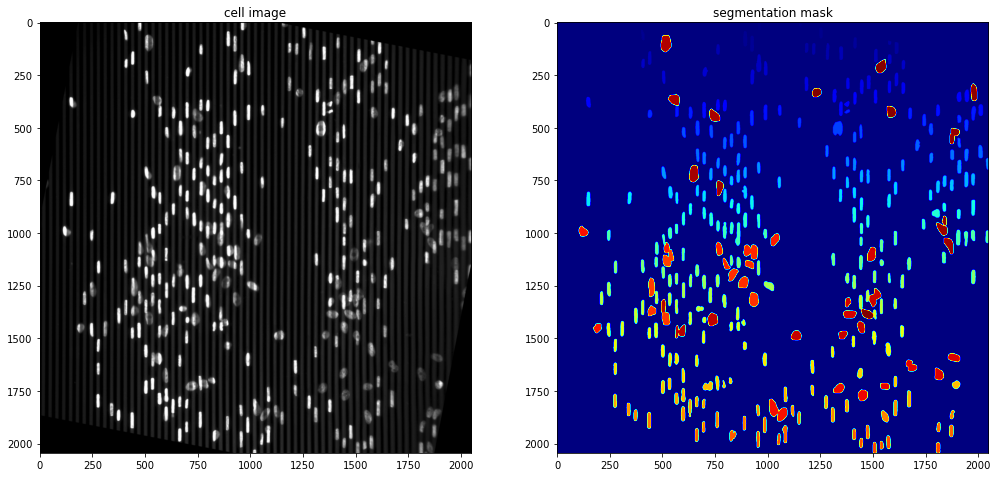

In [25]:
mask_path = Path_masks[0]
image_path = Path_images [0]
mask = io.imread(mask_path)
image = io.imread(image_path)
print ("number of labels" , np.max(mask))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))
pl1 = axes[0].imshow(image, cmap='gray')
axes[0].set_title("cell image") 
pl2 = axes[1].imshow(mask, cmap='jet')
axes[1].set_title("segmentation mask") 
 
plt.show()

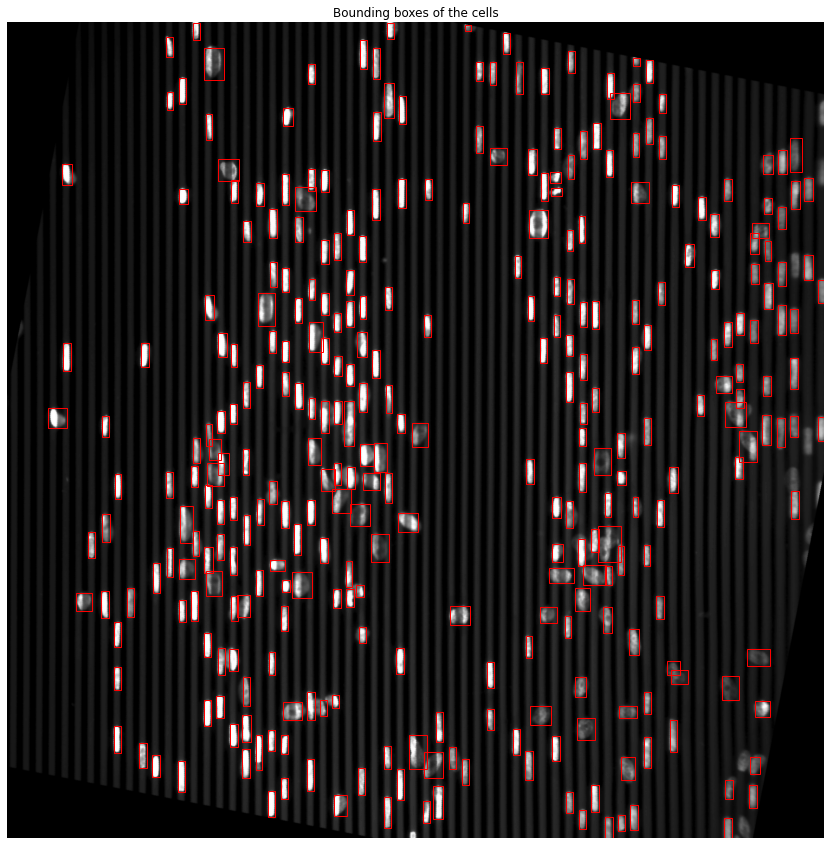

In [26]:
bboxs = bound_box(image, mask)

c:\Users\souhm\anaconda3\envs\allwhatyouneed\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


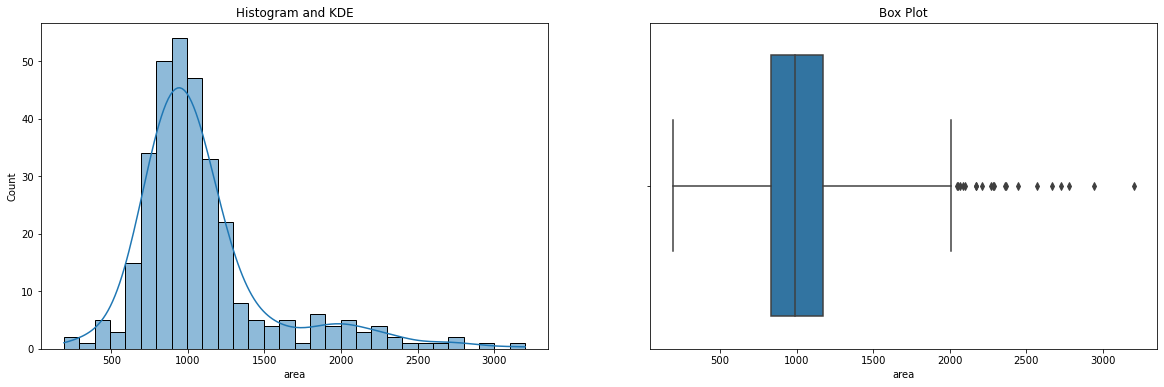

mean area 1093.09375


c:\Users\souhm\anaconda3\envs\allwhatyouneed\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


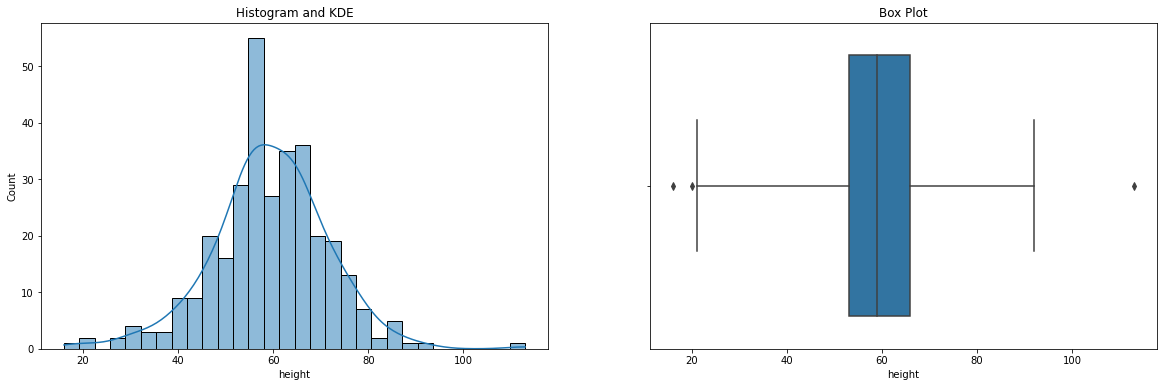

mean height 59.2875


c:\Users\souhm\anaconda3\envs\allwhatyouneed\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


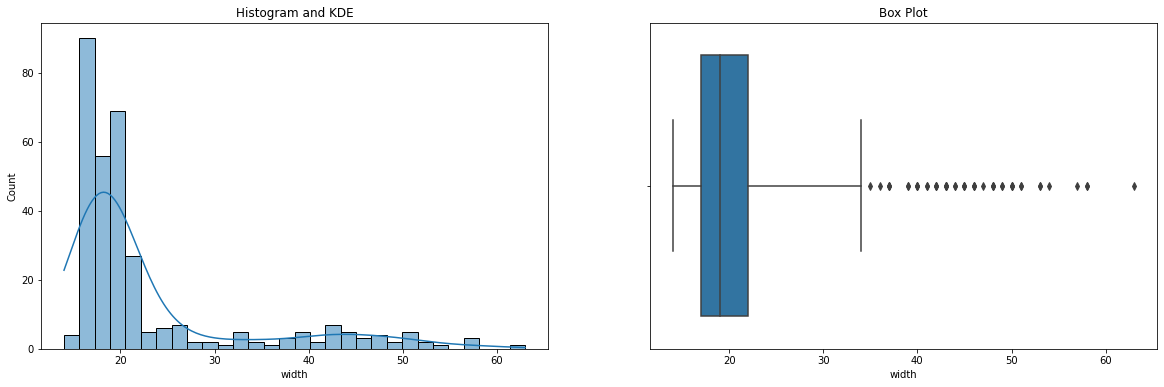

mean width 22.9


In [27]:
areas,heights,widths = properties_ROI(mask)

In [28]:
np.max(heights)

113

## Statistics for all images: Comparison of experimental properties

In [29]:

PATH_DATA = "./masks_channel_1/"
data_folders = os.listdir(PATH_DATA)
mean_areas = {}
mean_heights = {}
mean_widths = {}

max_areas = {}
max_heights = {}
max_widths = {}


In [30]:
for folder in data_folders: 
    PATH = os.path.join(PATH_DATA, folder,'masks')
    mask_paths = glob(PATH +"/*PNG")
    i=1
    for path in mask_paths:
        mask = io.imread(path)
        areas,heights,widths = properties_ROI(mask,aff=False)
        mean_areas[(folder,i)] = np.mean(areas)
        max_areas[(folder,i)] = np.max(areas)
 
        mean_heights[(folder,i)] = np.mean(heights)
        max_heights[(folder,i)] = np.max(heights)
        
        mean_widths[(folder,i)] = np.mean(widths)
        max_widths[(folder,i)] = np.max(widths)
        i+=1
   

### Discussion of mean values : experience effect 

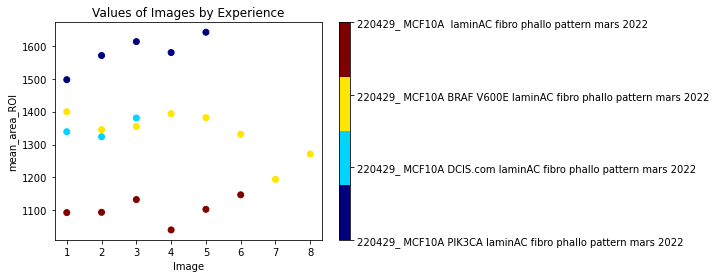

In [31]:
plot_features(mean_areas,"mean_area_ROI")

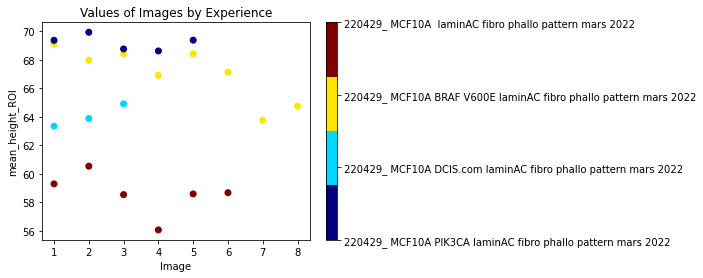

In [32]:
plot_features(mean_heights,"mean_height_ROI")

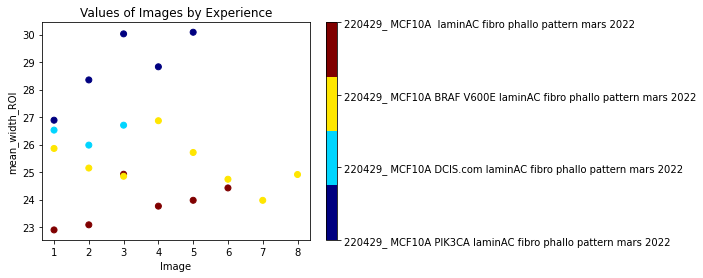

In [33]:
plot_features(mean_widths,"mean_width_ROI")

### Discussion of maximum values : crop size choice

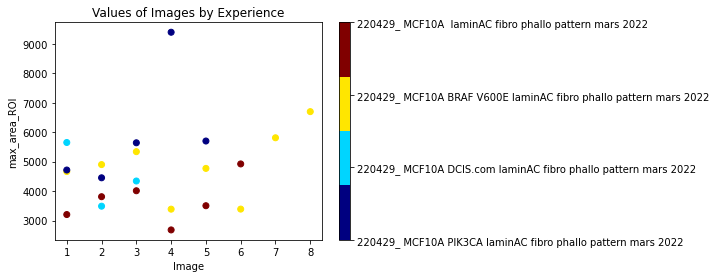

In [34]:
plot_features(max_areas,"max_area_ROI")

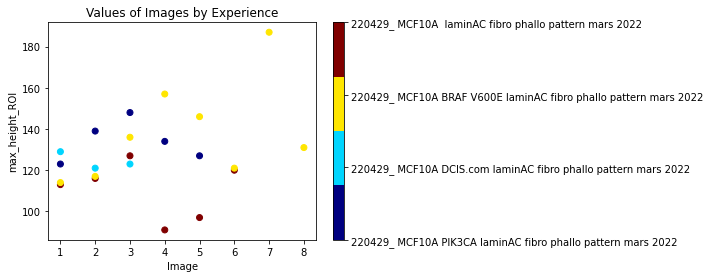

In [35]:
plot_features(max_heights,"max_height_ROI")

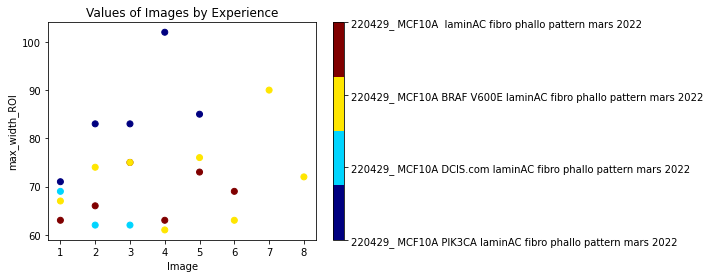

In [36]:
plot_features(max_widths,"max_width_ROI")